In [ ]:
#Import packages and dependecies

import pandas as pd
import numpy as np
import time, os

#Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

#Packages for preprocessing
import nltk
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

#Packages for trainig models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn import tree
import xgboost as xgb

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

2. Load Dataset

In [ ]:
df_train = pd.read_csv('/content/train_set.csv')
df_test = pd.read_csv('/content/test_set.csv')

In [ ]:
df_train.head(4)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...


In [ ]:
df_test.head(4)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...


3. EDA

In [ ]:
#info into language id
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [ ]:
print('shape of train dataset', df_train.shape)
df_train.lang_id.value_counts()


shape of train dataset (33000, 2)


xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


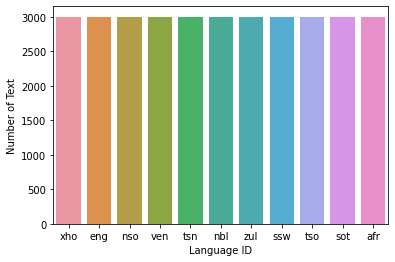

In [ ]:
#plotting sentiment graph

sns.countplot(df_train.lang_id,)
plt.xlabel('Language ID')
plt.ylabel('Number of Text')
plt.show()

Data Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
stopword=nltk.corpus.stopwords.words('english')
stopword.remove('not')
def processed_text(text):
  #Removing special characters
  text=re.sub(r'@[\w]*','',text)
  #Removing urls from text
  text=re.sub(r'http/S+','',text)
  #Removing Punctuations, Numbers, and Special Characters
  text=re.sub(r'[^A-Za-z#]',' ',text)   
  #Removing stopword
  
  #text=" ".join(i.lower() for i in text.split() if i.lower() not in stopword) 
   
  text = text.lower()
    # will split and join the words
  text=' '.join(text.split())
  return text
   
    
    
    

In [26]:
# Application of the function to clean the tweets
df_train['text'] = df_train['text'].apply(processed_text)
df_test['text'] = df_test['text'].apply(processed_text)

In [ ]:
# Replace '.txt' with 'text file'
#df_train["text"] = df_train["text"].str.replace(".txt", " text file")
#df_test["text"] = df_test["text"].str.replace(".txt", " text file")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


Feature Engineering

Data Splitting

In [27]:
X = df_train['text']
y = df_train['lang_id']

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=45)

Splitting of Training and Validation Sets

Model Building

In [37]:
classifiers = [LinearSVC(random_state=42),
                #SVC(),
                #tree.DecisionTreeClassifier(),
                #RandomForestClassifier(n_estimators=100, max_depth=2,
                 #                    random_state=0, class_weight="balanced"),
                #MLPClassifier(alpha=1e-5,
                 #            hidden_layer_sizes=(5, 2),
                  #           random_state=42),
               LogisticRegression(random_state=42,
                                  multi_class='ovr',
                                  n_jobs=1,
                                  C=1e5,
                                  max_iter=4000),
               KNeighborsClassifier(n_neighbors=5),
               MultinomialNB(),
               ComplementNB(),
               SGDClassifier(loss='hinge',
                             penalty='l2',
                             alpha=1e-3,
                             random_state=42,
                             max_iter=5,
                             tol=None),
               #GradientBoostingClassifier(),
               #xgb.XGBClassifier(learning_rate=0.1,
                                # n_estimators=1000,
                               #  max_depth=5,
                               #  min_child_weight=1,
                               #  gamma=0,
                                # subsample=0.8,
                                # colsample_bytree=0.8,
                                # nthread=4,
                                # seed=27)
                                ]

In [38]:
def models_building(classifiers, X_train, y_train, X_val, y_val):
    
    models_summary = {}

    # Pipeline to balance the classses and then to build the model
    for clf in classifiers:
        clf_text = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                                       max_df=0.9,
                                                       ngram_range=(1, 2))),
                             ('clf', clf)])

        # Logging the Execution Time for each model
        start_time = time.time()
        clf_text.fit(X_train, y_train)
        predictions = clf_text.predict(X_val)
        run_time = time.time()-start_time

        # Output for each model
        models_summary[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_val,
                                         predictions,
                                         average='macro'),
            'F1-Accuracy': metrics.f1_score(y_val, predictions,
                                            average='micro'),
            'F1-Weighted': metrics.f1_score(y_val,
                                            predictions,
                                            average='weighted'),
            'Execution Time': run_time}

    return pd.DataFrame.from_dict(models_summary, orient='index')

Run Classifiers

In [39]:
classifiers_df = models_building(classifiers, X_train, y_train, X_val, y_val)
ordered_df = classifiers_df.sort_values('F1-Macro', ascending=False)
ordered_df

,F1-Macro,F1-Accuracy,F1-Weighted,Execution Time
MultinomialNB,0.997151,0.997112,0.997107,5.696395
ComplementNB,0.997137,0.997112,0.997109,7.221675
LogisticRegression,0.995280,0.995187,0.995181,133.874395
LinearSVC,0.995145,0.995050,0.995042,10.305563
SGDClassifier,0.986144,0.986111,0.986041,6.778155
KNeighborsClassifier,0.962853,0.963009,0.962615,8.972767


Hyperparameter Tuning on Most Performing Models

In [40]:
# Refining the train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01)

Multinomial Naive Bayes (MNB)

In [41]:
# Creating a pipeline for the gridsearch
param_grid = {'alpha': [0.1, 1, 5, 10]}  # setting parameter grid

tuned_mnb = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                max_df=0.9,
                                                ngram_range=(1, 2))),
                      ('mnb', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])

tuned_mnb.fit(X_train, y_train)  # Fitting the model

y_pred_mnb = tuned_mnb.predict(X_val)  # predicting the fit on validation set

print(classification_report(y_val, y_pred_mnb))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        28
         eng       1.00      1.00      1.00        28
         nbl       1.00      0.96      0.98        28
         nso       1.00      1.00      1.00        22
         sot       1.00      1.00      1.00        29
         ssw       1.00      1.00      1.00        35
         tsn       1.00      1.00      1.00        24
         tso       1.00      1.00      1.00        23
         ven       1.00      1.00      1.00        25
         xho       1.00      1.00      1.00        27
         zul       0.96      1.00      0.98        22

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



Creating File for Submission

In [42]:
submission_df = pd.DataFrame(df_test['index'])
submission_df['lang_id'] = tuned_mnb.predict(df_test['text'])
submission_df.to_csv('sub_SA_Lang_Predict2.csv', index=False)

Reference

kolawole-aina
